In [1]:
# %pip install 'pyvista[vtk]'
# %pip install nilearn

In [2]:
import re
import json
import numpy as np
import pandas as pd
import pyvista as pv
import matplotlib.pyplot as plt

ATLAS = "AAL+CSF"
workdir = "/ASD/ahsan_projects/braintypicality/workdir/cuda_opt/learnable/eval"
roi_likelihood_file = f"{workdir}/heatmaps_v2/roi/{ATLAS}_roi_scores.csv"

roi_likelihoods = pd.read_csv(f"{workdir}/heatmaps_v2/roi/{ATLAS}_roi_likelihoods.csv")
roi_pct_scores = pd.read_csv(f"{workdir}/heatmaps_v2/roi/{ATLAS}_roi_scores.csv")
ibis_metadata = pd.read_csv("/ASD/ahsan_projects/braintypicality/dataset/ibis_metadata_v2.csv")
ibis_metadata.index = ibis_metadata["CandID"].apply(lambda x: "IBIS" + str(x))
ibis_metadata.index.name = "ID"
ibis_metadata = ibis_metadata.astype(np.float32, errors="ignore")

In [3]:
from nilearn import datasets, plotting
aal = datasets.fetch_atlas_aal(version='SPM12')
aal_roi_names = pd.read_csv(f"{workdir}/aal_labels.csv")

### Note that CIVET AAL is likely AAL2(?)
We have more brain ROIs via AAL3 e.g. Vermis_* 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6174681/table/t2-jpr-11-2131/

https://neurovault.org/images/14257/



In [4]:
%%writefile data/civet_aal_labels.txt
Number   Abbreviation    Description
27      'REC.L'         'Left Gyrus Rectus'
21      'OLF.L'         'Left Olfactory Cortex'
5       'ORBsup.L'      'Left Superior frontal gyrus, orbital part'
25      'ORBsupmed.L'   'Left Superior frontal gyrus, medial orbital'
9       'ORBmid.L'      'Left Middle frontal gyrus orbital part'
15      'ORBinf.L'      'Left Inferior frontal gyrus, orbital part'
3       'SFGdor.L'      'Left Superior frontal gyrus, dorsolateral'
7       'MFG.L'         'Left Middle frontal gyrus'
11      'IFGoperc.L'    'Left Inferior frontal gyrus, opercular part'
13      'IFGtriang.L'   'Left Inferior frontal gyrus, triangular part'
23      'SFGmed.L'      'Left Superior frontal gyrus, medial'
19      'SMA.L'         'Left Supplementary motor area'
69      'PCL.L'         'Left Paracentral lobule'
1       'PreCG.L'       'Left Precentral gyrus'
17      'ROL.L'         'Left Rolandic operculum'
57      'PoCG.L'        'Left Postcentral gyrus'
59      'SPG.L'         'Left Superior parietal gyrus'
61      'IPL.L'         'Left Inferior parietal, but supramarginal and angular gyri'
63      'SMG.L'         'Left Supramarginal gyrus'
65      'ANG.L'         'Left Angular gyrus'
67      'PCUN.L'        'Left Precuneus'
49      'SOG.L'         'Left Superior occipital gyrus'
51      'MOG.L'         'Left Middle occipital gyrus'
53      'IOG.L'         'Left Inferior occipital gyrus'
43      'CAL.L'         'Left Calcarine fissure and surrounding cortex'
45      'CUN.L'         'Left Cuneus'
47      'LING.L'        'Left Lingual gyrus'
55      'FFG.L'         'Left Fusiform gyrus'
79      'HES.L'         'Left Heschl gyrus'
81      'STG.L'         'Left Superior temporal gyrus'
85      'MTG.L'         'Left Middle temporal gyrus'
89      'ITG.L'         'Left Inferior temporal gyrus'
83      'TPOsup.L'      'Left Temporal pole: superior temporal gyrus'
87      'TPOmid.L'      'Left Temporal pole: middle temporal gyrus'
39      'PHG.L'         'Left Parahippocampal gyrus'
31      'ACG.L'         'Left Anterior cingulate and paracingulate gyri'
33      'DCG.L'         'Left Median cingulate and paracingulate gyri'
35      'PCG.L'         'Left Posterior cingulate gyrus'
29      'INS.L'         'Left Insula'
28      'REC.R'         'Right Gyrus Rectus'
22      'OLF.R'         'Right Olfactory Cortex'
6       'ORBsup.R'      'Right Superior frontal gyrus, orbital part'
26      'ORBsupmed.R'   'Right Superior frontal gyrus, medial orbital'
10      'ORBmid.R'      'Right Middle frontal gyrus orbital part'
16      'ORBinf.R'      'Right Inferior frontal gyrus, orbital part'
4       'SFGdor.R'      'Right Superior frontal gyrus, dorsolateral'
8       'MFG.R'         'Right Middle frontal gyrus'
12      'IFGoperc.R'    'Right Inferior frontal gyrus, opercular part'
14      'IFGtriang.R'   'Right Inferior frontal gyrus, triangular part'
24      'SFGmed.R'      'Right Superior frontal gyrus, medial'
20      'SMA.R'         'Right Supplementary motor area'
70      'PCL.R'         'Right Paracentral lobule'
2       'PreCG.R'       'Right Precentral gyrus'
18      'ROL.R'         'Right Rolandic operculum'
58      'PoCG.R'        'Right Postcentral gyrus'
60      'SPG.R'         'Right Superior parietal gyrus'
62      'IPL.R'         'Right Inferior parietal, but supramarginal and angular gyri'
64      'SMG.R'         'Right Supramarginal gyrus'
66      'ANG.R'         'Right Angular gyrus'
68      'PCUN.R'        'Right Precuneus'
50      'SOG.R'         'Right Superior occipital gyrus'
52      'MOG.R'         'Right Middle occipital gyrus'
54      'IOG.R'         'Right Inferior occipital gyrus'
44      'CAL.R'         'Right Calcarine fissure and surrounding cortex'
46      'CUN.R'         'Right Cuneus'
48      'LING.R'        'Right Lingual gyrus'
56      'FFG.R'         'Right Fusiform gyrus'
80      'HES.R'         'Right Heschl gyrus'
82      'STG.R'         'Right Superior temporal gyrus'
86      'MTG.R'         'Right Middle temporal gyrus'
90      'ITG.R'         'Right Inferior temporal gyrus'
84      'TPOsup.R'      'Right Temporal pole: superior temporal gyrus'
88      'TPOmid.R'      'Right Temporal pole: middle temporal gyrus'
40      'PHG.R'         'Right Parahippocampal gyrus'
32      'ACG.R'         'Right Anterior cingulate and paracingulate gyri'
34      'DCG.R'         'Right Median cingulate and paracingulate gyri'
36      'PCG.R'         'Right Posterior cingulate gyrus'
30      'INS.R'         'Right Insula'

Overwriting data/civet_aal_labels.txt


### Match civet-aal names to AAL abbreviations from SPM12 version

In [5]:
with open('data/civet_aal_labels.txt', "r") as f:
    header = f.readline()
    rows = f.readlines()

columns = re.split(r"\s+", header.strip())

df = pd.DataFrame(columns = columns)

for i,row in enumerate(rows):
    row = re.split(r"\s{3,}", row.strip())

    row[0] = int(row[0])
    row[1] = row[1].strip("'\"")
    row[2] = row[2].strip("'\"")
    
    df.loc[i] = row

civet_aal_roi_map = df.set_index('Number')
civet_roi_to_idx_map = {d:i for i, d in civet_aal_roi_map.Description.items()}

# df.Description.to_csv('clean_names.txt', index=None, header=None, sep="\n")
# aal_roi_names['ROI-Name'].to_csv('short_names.txt', index=None, header=None)

In [6]:
civet_aal_roi_map

,Abbreviation,Description
Number,,
27,REC.L,Left Gyrus Rectus
21,OLF.L,Left Olfactory Cortex
5,ORBsup.L,"Left Superior frontal gyrus, orbital part"
25,ORBsupmed.L,"Left Superior frontal gyrus, medial orbital"
9,ORBmid.L,Left Middle frontal gyrus orbital part
...,...,...
40,PHG.R,Right Parahippocampal gyrus
32,ACG.R,Right Anterior cingulate and paracingulate gyri
34,DCG.R,Right Median cingulate and paracingulate gyri


In [7]:
# Open the JSON file and load it into a dictionary
with open('data/aal-atlas-name-mapping.json', 'r') as file:
    short_to_desc = json.load(file)

desc_to_short = {v:k for k,v in short_to_desc.items()}

# Fixing typos and shortening descriptions
short_to_desc['background'] = "Background"
short_to_desc['Frontal_Sup_Orb_L'] = 'Left Superior frontal gyrus, orbital part'
short_to_desc['Frontal_Sup_Orb_R'] = 'Right Superior frontal gyrus, orbital part'
short_to_desc['Parietal_Inf_L']    = 'Left Inferior parietal'
short_to_desc['Parietal_Inf_R']    = 'Right Inferior parietal'

In [8]:
for r in aal.labels:
    if r not in short_to_desc: print(r)

In [9]:
clean_names = set(df.Description)
short_names = set(aal.labels)

missing_civet_labels = []
civet_short_names = []

for k,v in desc_to_short.items():
    if k not in clean_names:
        missing_civet_labels.append(k)
    else:
        civet_short_names.append(v)
    if v not in short_names: print(v, "Not present in AAL labels")

missing_civet_labels, len(civet_short_names)

(['Left Hippocampus',
  'Right Hippocampus',
  'Left Amygdala',
  'Right Amygdala',
  'Left Caudate',
  'Right Caudate',
  'Left Putamen',
  'Right Putamen',
  'Left Pallidum',
  'Right Pallidum',
  'Left Thalamus',
  'Right Thalamus',
  'Left Crus I of cerebellar hemisphere',
  'Right Crus I of cerebellar hemisphere',
  'Left Crus II of cerebellar hemisphere',
  'Right Crus II of cerebellar hemisphere',
  'Left Lobule III of cerebellar hemisphere',
  'Right Lobule III of cerebellar hemisphere',
  'Left Lobule IV, V of cerebellar hemisphere',
  'Right Lobule IV, V of cerebellar hemisphere',
  'Left Lobule VI of cerebellar hemisphere',
  'Right Lobule VI of cerebellar hemisphere',
  'Left Lobule VIIB of cerebellar hemisphere',
  'Right Lobule VIIB of cerebellar hemisphere',
  'Left Lobule VIII of cerebellar hemisphere',
  'Right Lobule VIII of cerebellar hemisphere',
  'Left Lobule IX of cerebellar hemisphere',
  'Right Lobule IX of cerebellar hemisphere',
  'Left Lobule X of cerebellar

### Loading DS information

In [10]:
dssamples = roi_likelihoods.query("Cohort == 'IBIS-DS'")
ds_bmu_ids = pd.read_csv("data/ds_prototypes_11x11.csv")
largest_prototype_bmu_idx = ds_bmu_ids.groupby('bmu').count().idxmax()[0]
ds_max_prototype_ids = ds_bmu_ids[ds_bmu_ids.bmu == largest_prototype_bmu_idx]['ID']
prot_ids_set = set(ds_max_prototype_ids)
ds_prototypes = dssamples.merge(ds_max_prototype_ids, on='ID')
ds_non_prototypes = dssamples[~dssamples['ID'].isin(ds_max_prototype_ids)]
len(ds_prototypes), len(ds_non_prototypes)

(16, 12)

In [11]:
corr_pvals = pd.read_csv("data/full-corr_pvals.csv", index_col=0).astype({'p-value':float, 'Corr':float})

significant_corrs = corr_pvals[corr_pvals['p-value'] < 0.05]
significant_corr_behaviours = set(significant_corrs.Behavior)
significant_corr_rois = set(significant_corrs.ROI)

roi_correlations = significant_corrs.pivot(index='ROI', columns='Behavior', values='Corr').fillna(0)
roi_correlations.tail(3)

Behavior,CBCL-attention_hyper_prob_score,CBCL-attention_prob_score,CBCL-depressed_score,CBCL-internalizing_score,CBCL-oppo_def_prob_score,CBCL-rule_break_behav_score,CBCL-sluggish_cogn_tempo_score,CBCL-social_prob_score,CBCL-som_prob_score,CBCL-thought_prob_score,CBCL-total_problems_score,"VSA DAS_SA,rd_ABILITY_SCORE","VSA DAS_SA,seq_qr_ABILITY_SCORE","VSA DAS_SA,verbal_similarities_ABILITY_SCORE","VSA DAS_SA,word_defn_ABILITY_SCORE",Vineland-community_RAW_SCORE,Vineland-copy_skills_RAW_SCORE,Vineland-domestic_RAW_SCORE,Vineland-expressive_RAW_SCORE,Vineland-written_RAW_SCORE
ROI,,,,,,,,,,,,,,,,,,,,
Right Temporal pole: middle temporal gyrus,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.628716,0.0,0.0,0.0,-0.631486,-0.615386,-0.709682,0.0,0.0
Right Temporal pole: superior temporal gyrus,0.0,0.0,0.648988,0.531202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.764461,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
Right Thalamus,0.0,0.0,0.707987,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [12]:
significant_corrs.Corr.min(), significant_corrs.Corr.max(), 

(-0.850195220295277, 0.8602426322060833)

In [13]:
ds_avg_scores = roi_pct_scores.query("Cohort == 'IBIS-DS'").mean(0)
ds_avg_ll = roi_likelihoods.query("Cohort == 'IBIS-DS'").mean(0)

proto_avg_scores = ds_prototypes.mean(0)
non_proto_avg_scores = ds_non_prototypes.mean(0)

ranked_rois = [c for c in proto_avg_scores.sort_values(ascending=False).index if c in short_to_desc and "_R" in c]
sig_roi_short_names = [desc_to_short[r] for r in significant_corrs.ROI if r in desc_to_short]

In [14]:
matching_names = [roi for roi in civet_short_names if roi in sig_roi_short_names]
len(matching_names)

64

In [15]:
ds_avg_ll[matching_names].quantile([0.01, 0.1, 0.5, 0.8, 0.9, 0.999, 1.0])

0.010   -17.348706
0.100   -15.015046
0.500   -11.910910
0.800    -8.559355
0.900    -5.103928
0.999    -3.899696
1.000    -3.875608
dtype: float64

In [16]:
proto_avg_scores[matching_names].quantile([0.01, 0.1, 0.5, 0.8, 0.9, 0.999, 1.0])

0.010   -16.617380
0.100   -14.406407
0.500   -10.633602
0.800    -7.465298
0.900    -4.081144
0.999    -2.399857
1.000    -2.382072
dtype: float64

<Axes: >

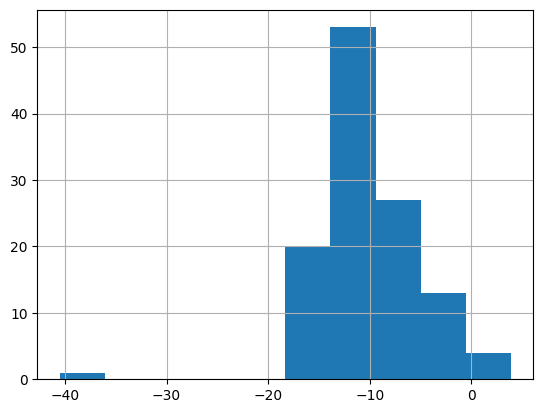

In [17]:
proto_avg_scores.hist(label='Proto')

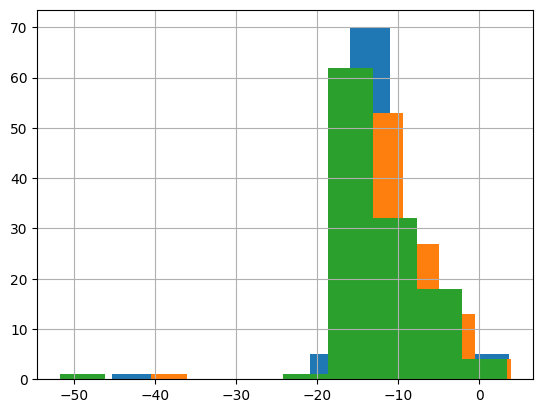

In [18]:
ds_avg_ll.hist(label="DS-All")
proto_avg_scores.hist(label='Proto')
non_proto_avg_scores.hist(label='non-proto');

In [19]:
for abbv in ranked_rois[:10]:
    name = short_to_desc[abbv]
    if name in civet_roi_to_idx_map:
        idx = civet_roi_to_idx_map[name]
        print(f"{idx}: {name}, {abbv}")

88: Right Temporal pole: middle temporal gyrus, Temporal_Pole_Mid_R
6: Right Superior frontal gyrus, orbital part, Frontal_Sup_Orb_R
10: Right Middle frontal gyrus orbital part, Frontal_Mid_Orb_R
28: Right Gyrus Rectus, Rectus_R
22: Right Olfactory Cortex, Olfactory_R
40: Right Parahippocampal gyrus, ParaHippocampal_R


In [20]:
def populate_anomaly_scores(polydata):
#     pointwise_anomaly_scores = []
#     pointwise_anomaly_likelihoods = []
#     pointwise_non_proto_scores = []
    
    pointwise_sig_rois = []
    pointwise_proto_scores = []
    
    
    p = polydata.points
    aal_roi = polydata.point_data['AAL']

    for i in range(len(p)):
        idx = int(aal_roi[i])
        if idx == 0:
            roi_short_name = 'background'
        else:
            roi = civet_aal_roi_map.loc[idx, 'Description']
            roi_short_name = desc_to_short[roi]
        
        if roi_short_name in sig_roi_short_names:
            pointwise_sig_rois.append(proto_avg_scores[roi_short_name])
        else: # put in baseline/dummy values
            pointwise_sig_rois.append(proto_avg_scores[roi_short_name]*0 + proto_avg_scores.min())
        
#         pointwise_anomaly_scores.append(ds_avg_scores[roi_short_name])
#         pointwise_anomaly_likelihoods.append(ds_avg_ll[roi_short_name])
#         pointwise_non_proto_scores.append(non_proto_avg_scores[roi_short_name])
        pointwise_proto_scores.append(proto_avg_scores[roi_short_name])
        

#     polydata.point_data['anomaly-percentile-scores'] = np.array(pointwise_anomaly_scores)
#     polydata.point_data['anomaly-likelihood'] = np.array(pointwise_anomaly_likelihoods)
#     polydata.point_data['prototype-difference'] = np.array(pointwise_proto_scores) - np.array(pointwise_non_proto_scores)
#     polydata.point_data['nonproto-anomaly-ll'] = np.array(pointwise_non_proto_scores)

    polydata.point_data['prototype-anomaly-ll'] = np.array(pointwise_proto_scores)
    polydata.point_data['proto-significant-roi'] = np.array(pointwise_sig_rois)
    
    
def populate_correlations(polydata):
    
    corrmap = {b:[] for b in significant_corr_behaviours}
    p = polydata.points
    aal_roi = polydata.point_data['AAL']
    
    for behavior in corrmap:
        print(behavior)
        for i in range(len(p)):
            idx = int(aal_roi[i])
            if idx == 0:
                roi = 'background'
            else:
                roi = civet_aal_roi_map.loc[idx, 'Description']
                roi_short_name = desc_to_short[roi]
            
            roi_cleaned_name = short_to_desc[roi_short_name]
    
            if roi_cleaned_name in significant_corr_rois:
                corr = roi_correlations.loc[roi_cleaned_name, behavior]
            else:
                corr = 0
            corrmap[behavior].append(corr)

        polydata.point_data[behavior] = np.array(corrmap[behavior])

In [21]:
## left hemisphere
filename = "data/icbm_avg_mid_sym_mc_left_hires_withAAL.vtk"
polydata = pv.read(filename)
populate_anomaly_scores(polydata)
populate_correlations(polydata)
polydata.save('data/ds_anomaly_scores_left.vtk',binary=False)

CBCL-oppo_def_prob_score
CBCL-som_prob_score
Vineland-written_RAW_SCORE
Vineland-expressive_RAW_SCORE
CBCL-attention_hyper_prob_score
CBCL-sluggish_cogn_tempo_score
VSA DAS_SA,rd_ABILITY_SCORE
VSA DAS_SA,word_defn_ABILITY_SCORE
VSA DAS_SA,verbal_similarities_ABILITY_SCORE
CBCL-internalizing_score
CBCL-total_problems_score
Vineland-domestic_RAW_SCORE
CBCL-thought_prob_score
CBCL-attention_prob_score
VSA DAS_SA,seq_qr_ABILITY_SCORE
Vineland-community_RAW_SCORE
Vineland-copy_skills_RAW_SCORE
CBCL-rule_break_behav_score
CBCL-social_prob_score
CBCL-depressed_score


In [22]:
## right hemisphere
filename = "data/icbm_avg_mid_sym_mc_right_hires_withAAL.vtk"
polydata = pv.read(filename)
populate_anomaly_scores(polydata)
populate_correlations(polydata)
polydata.save('data/ds_anomaly_scores_right.vtk',binary=False)

CBCL-oppo_def_prob_score
CBCL-som_prob_score
Vineland-written_RAW_SCORE
Vineland-expressive_RAW_SCORE
CBCL-attention_hyper_prob_score
CBCL-sluggish_cogn_tempo_score
VSA DAS_SA,rd_ABILITY_SCORE
VSA DAS_SA,word_defn_ABILITY_SCORE
VSA DAS_SA,verbal_similarities_ABILITY_SCORE
CBCL-internalizing_score
CBCL-total_problems_score
Vineland-domestic_RAW_SCORE
CBCL-thought_prob_score
CBCL-attention_prob_score
VSA DAS_SA,seq_qr_ABILITY_SCORE
Vineland-community_RAW_SCORE
Vineland-copy_skills_RAW_SCORE
CBCL-rule_break_behav_score
CBCL-social_prob_score
CBCL-depressed_score


In [25]:
ds_lls = roi_likelihoods.query("Cohort == 'IBIS-DS'")
ds_lls.head(3)

,background,CSF,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,...,Vermis_1_2,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10,Cohort,ID
0,-38.342600,3.548188,-11.646181,-9.907785,-7.934814,-9.100883,-2.757597,-2.158922,-9.024731,-8.604287,...,-3.222740,-6.494202,-7.872440,-8.624404,-10.763305,-7.665647,-7.883346,4.894085,IBIS-DS,IBIS105477
1,-42.486153,1.753893,-15.714825,-14.254395,-11.120783,-10.769796,-3.553080,-1.557293,-11.703229,-9.776938,...,-2.625751,-7.335042,-12.052112,-12.190157,-13.861318,-13.434856,-10.510234,1.819406,IBIS-DS,IBIS110925
2,-50.997784,0.811730,-17.547384,-17.204912,-14.363505,-15.291785,-7.133755,-7.762352,-14.926660,-15.745519,...,-4.278722,-6.245064,-12.506188,-13.483248,-13.174057,-13.846085,-8.171009,3.153166,IBIS-DS,IBIS123451


In [35]:
ds_lls.iloc[1]['ID']

'IBIS110925'

In [36]:
## Individual anomaly scores for plotting hemisphere
filename = "data/icbm_avg_mid_sym_mc_left_hires_withAAL.vtk"
polydata = pv.read(filename)

    
for i in range(3):
    sample = ds_lls.iloc[i]
    minval = sample.values[:-2].min()
    p = polydata.points
    aal_roi = polydata.point_data['AAL']
    pointwise_roi_scores = []
    
    for i in range(len(p)):
        idx = int(aal_roi[i])
        if idx == 0:
            roi_short_name = 'background'
        else:
            roi = civet_aal_roi_map.loc[idx, 'Description']
            roi_short_name = desc_to_short[roi]
        
        if roi_short_name in sig_roi_short_names:
            pointwise_roi_scores.append(sample[roi_short_name])
        else: # put in baseline/dummy values
            pointwise_roi_scores.append(minval)
            
    polydata.point_data[sample['ID']] = np.array(pointwise_roi_scores)

polydata.save('data/ds_individual_anomaly_scores_left.vtk',binary=False)